<a href="https://colab.research.google.com/github/Natalkina/DataScience/blob/HW2/Hw2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv
Прочитайте отриману таблицю, використовуючи метод head
Визначте розмір таблиці за допомогою методу shape
Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [ ]:
dev_info=pd.read_csv("https://raw.githubusercontent.com/Natalkina/datasets/main/2017_jun_final.csv")
print(dev_info.head())
rows, columns = dev_info.shape
print("Кількість рядків: ", rows)
print("Кількість cтовпців: ", columns)
print(dev_info.dtypes)

   N                 Должность Язык.программирования Специализация  \
0  1        Junior QA engineer                   NaN     Manual QA   
1  2        Junior QA engineer                   NaN     Manual QA   
2  3         Software Engineer               C#/.NET           NaN   
3  4         Software Engineer            JavaScript           NaN   
4  5  Senior Software Engineer            JavaScript           NaN   

  Общий.опыт.работы Опыт.работы.на.текущем.месте  Зарплата.в.месяц  \
0               0.5                          0.5               400   
1  меньше 3 месяцев             меньше 3 месяцев               430   
2                 4                            1              2500   
3                 5                            4              2000   
4    10 и более лет                          0.5              4500   

   Изменение.зарплаты.за.12.месяцев    Город     Размер.компании  ...  \
0                                 0  Харьков       до 10 человек  ...   
1           

Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"
Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"

In [ ]:
dev_info.columns = ['number', 'position', 'programming_language', 'specialty', 'total_work_experience', 'current_work_experience', 'salary', 'salary_change_for_12month', 'city', 'company_size', 'company_type', 'gender', 'age', 'education', 'university', 'student', 'english_level', 'field', 'date', 'user_agent', 'exp', 'cuurent_job_exp', 'salary2', 'currency', 'cls']
missing_val = dev_info.isnull().sum()/ len(dev_info)
print("Missing values in columns: ", missing_val)
columns_to_keep = ['programming_language']
d = dev_info.isna().any()
d[columns_to_keep] = False
dev_info_cleaned = dev_info.loc[:, ~d]
print("Missing values in columns after: ", dev_info_cleaned.isnull().sum()/ len(dev_info_cleaned))

Missing values in columns:  number                       0.000000
position                     0.000000
programming_language         0.442325
specialty                    0.829389
total_work_experience        0.000000
current_work_experience      0.000000
salary                       0.000000
salary_change_for_12month    0.000000
city                         0.000000
company_size                 0.000000
company_type                 0.000000
gender                       0.000000
age                          0.000000
education                    0.000000
university                   0.041131
student                      0.000000
english_level                0.000000
field                        0.025620
date                         0.000000
user_agent                   0.000000
exp                          0.000000
cuurent_job_exp              0.000000
salary2                      0.000000
currency                     0.998851
cls                          0.180836
dtype: float64
Missing

Видаліть усі рядки у вихідній таблиці за допомогою методу dropna
Визначте новий розмір таблиці за допомогою методу shape

In [ ]:
dev_info.dropna(inplace=True)
print(dev_info.shape)

(0, 25)


Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python
Визначте розмір таблиці python_data за допомогою методу shape

In [ ]:
python_data = dev_info_cleaned[dev_info_cleaned['programming_language']=='Python']
print(python_data.shape)

(207, 20)


Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"
Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"

In [ ]:
grouped_data = python_data.groupby('position').agg(min_salary=('salary', 'min'), max_salary=('salary', 'max'))
print(grouped_data)

                          min_salary  max_salary
position                                        
Junior Software Engineer         100        1250
Senior Software Engineer        1300        9200
Software Engineer                500        5400
System Architect                3000        5000
Technical Lead                  1425        6200


Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg"

In [ ]:
def fill_avg_salary(row):
    return (row['min_salary'] + row['max_salary'])/2

grouped_data['avg'] = grouped_data.apply(fill_avg_salary, axis=1)
print(grouped_data)

                          min_salary  max_salary     avg
position                                                
Junior Software Engineer         100        1250   675.0
Senior Software Engineer        1300        9200  5250.0
Software Engineer                500        5400  2950.0
System Architect                3000        5000  4000.0
Technical Lead                  1425        6200  3812.5


Створіть описову статистику за допомогою методу describe для нового стовпчика.

In [ ]:
print(grouped_data['avg'].describe())

count       5.000000
mean     3337.500000
std      1700.091909
min       675.000000
25%      2950.000000
50%      3812.500000
75%      4000.000000
max      5250.000000
Name: avg, dtype: float64


Збережіть отриману таблицю в CSV файл

In [ ]:
grouped_data.to_csv('pyton_salary_stat.csv')

In [ ]:
!ls

pyton_salary_stat.csv  sample_data


Середній рівень ЗП залежно від міста роботи  

In [ ]:
grouped_data = dev_info_cleaned.groupby('city').agg(avg_salary =('salary', 'mean')).sort_values('avg_salary', ascending=False)
grouped_data['avg_salary'] = grouped_data['avg_salary'].round(2)
print(grouped_data)

                 avg_salary
city                       
Удаленно            2332.56
Другой              1949.30
Киев                1898.92
Львов               1672.64
Луцк                1663.75
Одесса              1583.83
Харьков             1454.41
Днепр               1438.16
Винница             1425.16
Ивано-Франковск     1150.08
Чернигов            1110.70
Херсон              1061.38
Черновцы            1054.95
Житомир             1042.60
Запорожье           1013.68
Черкассы            1009.72
Хмельницкий          958.37
Мариуполь            950.60
Тернополь            950.29
Николаев             892.12
Ровно                818.26
Кропивницкий         811.76
Сумы                 769.43
Ужгород              721.47
Полтава              644.87


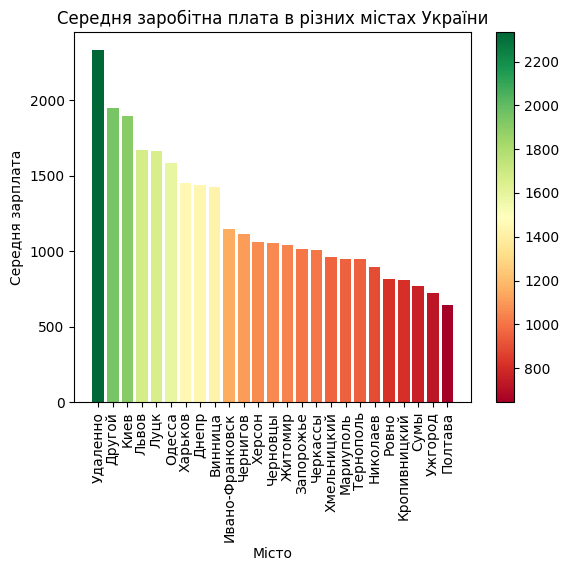

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
colormap = plt.colormaps['RdYlGn']
normalize = plt.Normalize(vmin=grouped_data['avg_salary'].min(), vmax=grouped_data['avg_salary'].max())
fig, ax = plt.subplots()
bars = ax.bar(grouped_data.index, grouped_data['avg_salary'], color=colormap(normalize(grouped_data['avg_salary'])))
ax.set_xlabel('Місто')
ax.set_ylabel('Середня зарплата')
ax.set_title('Середня заробітна плата в різних містах України')
plt.xticks(rotation=90)
sm = plt.cm.ScalarMappable(cmap=colormap, norm=normalize)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
plt.show()

Подивимося на розподіл заробітних плат залежно від позиції розробника

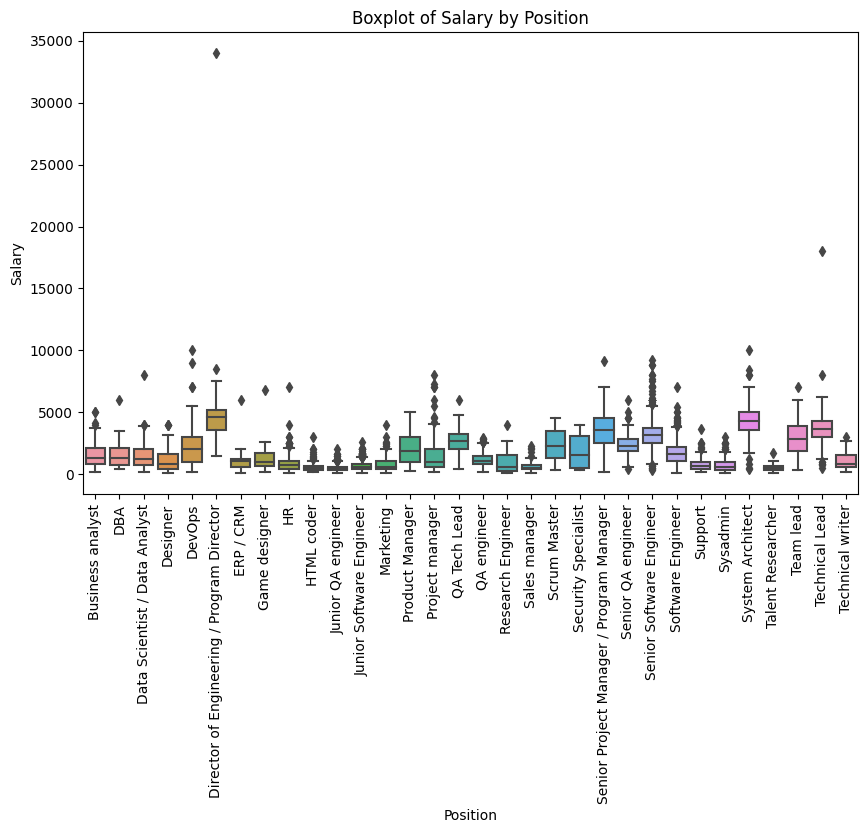

In [ ]:
import seaborn as sns
data_salary = dev_info_cleaned[['salary', 'position']].sort_values('position', ascending=True)
plt.figure(figsize=(10, 6))
sns.boxplot(x='position', y='salary', data=data_salary)
plt.xlabel('Position')
plt.ylabel('Salary')
plt.title('Boxplot of Salary by Position')
plt.xticks(rotation=90)
plt.show()

Подивимось на загальний досвід роботи та рівень ЗП

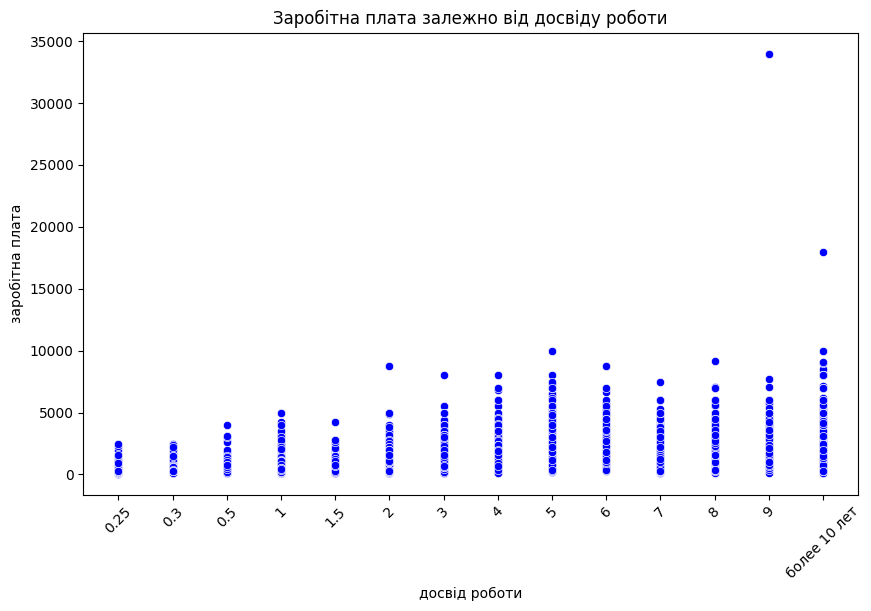

In [ ]:
data_experience = dev_info_cleaned[['salary', 'total_work_experience']]
data_experience = data_experience.replace(['10 и более лет', 'меньше 3 месяцев'], ['более 10 лет', '0.3']).sort_values('total_work_experience', ascending=True)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_work_experience', y='salary', data=data_experience, color='blue')
plt.xlabel('досвід роботи')
plt.ylabel('заробітна плата')
plt.title('Заробітна плата залежно від досвіду роботи')
plt.xticks(rotation=45)
plt.show()

Оцінимо який досвід роботи є у розробників


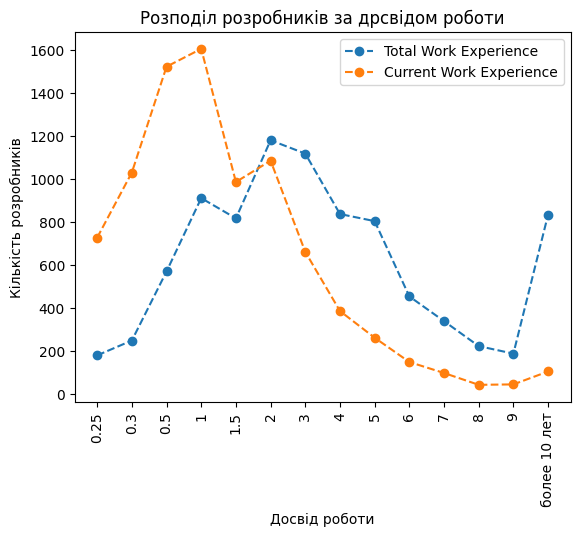

In [28]:
data_exp = dev_info_cleaned[['number', 'total_work_experience', 'current_work_experience']].replace(['10 и более лет', 'меньше 3 месяцев'], ['более 10 лет', '0.3'])

count_total = data_exp['number'].groupby(data_exp['total_work_experience']).count()
count_current = data_exp['number'].groupby(data_exp['current_work_experience']).count()

plt.plot(count_total.index, count_total.values, linestyle='--', marker='o', label='Total Work Experience')
plt.plot(count_current.index, count_current.values, linestyle='--', marker='o', label='Current Work Experience')
plt.xlabel('Досвід роботи')
plt.ylabel('Кількість розробників')
plt.title('Розподіл розробників за дрсвідом роботи')
plt.xticks(rotation=90)
plt.legend()
plt.show()



